In [1]:
import math
import torch
import matplotlib.pyplot as plt

In [2]:
# 학습용 데이터
x = torch.linspace(-math.pi, math.pi, 1000)
# 정답
y = torch.sin(x)

In [5]:
# 3차 다항식
# f(x) = ax**3 + bx**2 + cx + d
# 초기화
a,b,c,d = torch.randn(()),torch.randn(()),torch.randn(()),torch.randn(())
y_random = a*x**3 + b*x**2 + c*x + d

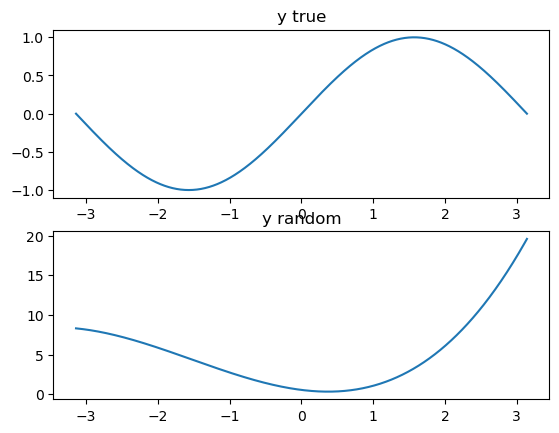

In [7]:
# 시각화
# 1.실제값 시각화
plt.subplot(2,1,1)
plt.title('y true')
plt.plot(x,y)
# 2 임의의 가중치로 만든 예측용 값으로 시각화
plt.subplot(2,1,2)
plt.title('y random')
plt.plot(x,y_random)

plt.show()

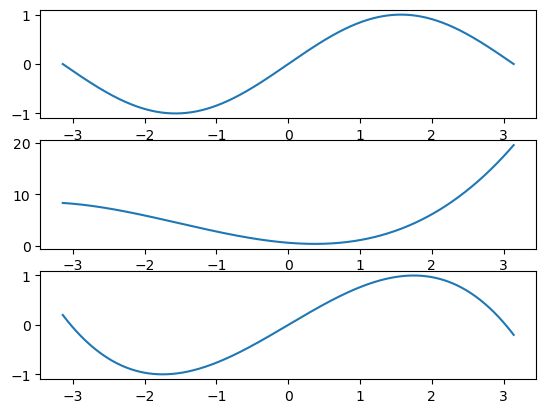

In [15]:
# 파라메터 정의
learning_rate = 1e-6
total_loss = []
for epoch in range(2000):
    # forward
    y_pred = a*x**3 + b*x**2 + c*x + d  # 모델
    # 손실 정의  MSE(평균제곱오차)  # 오차를 제곱 음수를 방지해서 크기만 보도록
    # 오차가 큰 값에 더 큰 패널티 부여
    loss = torch.sqrt((y_pred - y)**2).mean().item()  # 텐서에 저장된 숫자값만 추출 (그래프 추적을 피함)
    total_loss.append(loss)
    # 역전파 계산(BackPropagation) loss 줄이기 위해서  a,b,c,d 어느 방향으로 움직여야 할지 계산
    # 미분
    grad_y_pred = 2.0*(y_pred - y)  #기울기의 미분값
    grad_a = 2.0*(grad_y_pred*x**3).sum()
    grad_b = 2.0*(grad_y_pred*x**2).sum()
    grad_c = 2.0*(grad_y_pred*x).sum()
    grad_d = 2.0*(grad_y_pred).sum()
    # 가중치 업데이트
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

plt.subplot(3,1,1)
plt.plot(x,y)
plt.subplot(3,1,2)
plt.plot(x,y_random)
plt.subplot(3,1,3)
plt.plot(x, y_pred)

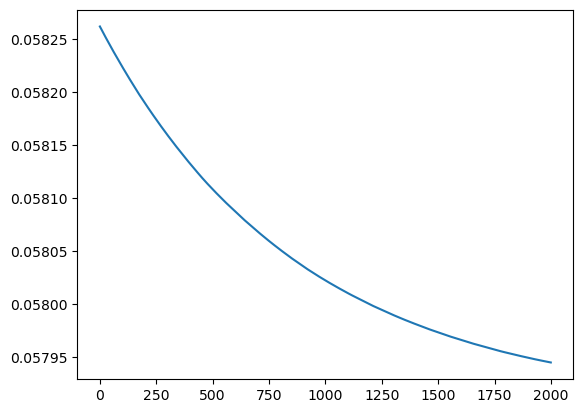

In [13]:
plt.plot(range(2000), total_loss)

D-loss / D-a
D-loss / D-b
D-loss / D-c
D-loss / D-d

loss는 파라메터들과 직접 연관이 없음
다만 다음과 같은 연쇠구조을 가진다(chain)

a,b,c,d -> ypred -> loss
loss = (ypred - loss)

D-loss / D-a  = D-ypred / D-a @ D-loss / D-ypred

 D-loss / D-ypred = 2x(ypred - y)

 D-ypred / D-a = x**3

In [ ]:
# 보스턴 집값 예측
# from sklearn.datasets import load_boston
# dataset = load_boston()
# dataset

import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


In [21]:
data.shape[1]

13

In [32]:
# pytorch
# 미분을 자동으로 계산
# 계산된 미분을 optimizer를 통해 적용 : 최적화 알고리즘
import torch
import torch.nn as nn
from torch.optim.adam import Adam
# 모델 정의
model = nn.Sequential(
    nn.Linear(data.shape[1] , 100),  # 13의 데이터를 입력받아서 결과를 100개 즉 100개를 예측
    nn.ReLU(),
    nn.Linear(100, 1)  # 100개의 예측결과를 받아서 최종 1개를 예측
)

# 하이퍼 파라메터 정의
batch_size = 100
learning_rate = 1e-03  # 0.001

# 옵티마이져 정의
optim = Adam(model.parameters(), lr=learning_rate)

# 학습루프
for epoch in range(200):
    for i in range(len(data) // batch_size):
        start = i*batch_size
        end = start + batch_size
        X = torch.FloatTensor(data[start:end])
        y = torch.FloatTensor(target[start:end])

        optim.zero_grad()  # 학습이후 다음 학습에 이전 가중치가 계산되는것을 방지
        preds = model(X)
        loss = nn.MSELoss()(preds, y)  
        loss.backward()  # 기울기 계산
        optim.step()  # 업데이트
    if epoch % 20 == 0:
        print(f'epoch : {epoch + 1} : loss : {loss.item()}')    

c:\Users\playdata2\miniconda3\envs\deep\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch : 1 : loss : 370.777099609375
epoch : 21 : loss : 46.02422332763672
epoch : 41 : loss : 42.64775848388672
epoch : 61 : loss : 40.89588165283203
epoch : 81 : loss : 39.8569450378418
epoch : 101 : loss : 39.349239349365234
epoch : 121 : loss : 38.755218505859375
epoch : 141 : loss : 38.56572723388672
epoch : 161 : loss : 38.3322639465332
epoch : 181 : loss : 38.20030975341797
